In [19]:
# Simulation for SAT solving shardware
# reference: Shim, Chaeyun, Jooyoung Bae, and Bongjin Kim. "30.3 VIP-Sat: A Boolean Satisfiability Solver Featuring 5× 12 Variable In-Memory Processing Elements with 98% Solvability for 50-Variables 218-Clauses 3-SAT Problems." 2024 IEEE International Solid-State Circuits Conference (ISSCC). Vol. 67. IEEE, 2024.

In [20]:
# 데이터셋 위치  
# /data2/sat/uf50-218  
# /data2/sat/uf20-91 
# 출처: https://www.cs.ubc.ca/~hoos/SATLIB/benchm.html

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
import numpy as np

def read_cnf_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    clauses = []

    clause_save_start = False
    clause_count = 0
    for line in lines:
        if clause_save_start == True:
            clause = list(map(int, line.strip().split()))
            assert clause[-1] == 0
            clause = clause[:-1]  # Remove the trailing 0
            clauses.append(clause)
            clause_count += 1
            if clause_count == num_clauses:
                break

        if line.startswith(('p')) and clause_save_start == False:
            clause_save_start = True
            _, _, num_vars, num_clauses = line.split()
            num_vars = int(num_vars)
            num_clauses = int(num_clauses)
    assert clause_save_start == True

    clauses = np.array(clauses)
    return clauses, num_vars, num_clauses

In [23]:
import numpy as np
import matplotlib.pyplot as plt


# 상관 행렬을 그리고 시각화하는 함수 정의
def plot_correlation_matrix(file_path):
    
    clauses, num_vars, num_clauses= read_cnf_file(file_path)

    # clauses 리스트에서 절에 포함된 변수들 중 가장 큰 숫자를 찾아서 변수의 개수를 구함
    num_vars = max(abs(var) for clause in clauses for var in clause)

    # num_vars 크기의 제로 행렬을 만들어서 상관 관계를 표시할 준비
    correlation_matrix = np.zeros((num_vars, num_vars), dtype=int)

    # 각 절(clause)에서 변수를 두 개씩 비교하며 상관 관계를 행렬에 기록
    for clause in clauses:
        for i, var1 in enumerate(clause):
            # 현재 변수(var1)와 같은 절(clause)에 포함된 다른 변수들(var2) 간의 상관 관계를 기록
            for var2 in clause[i+1:]:
                abs_var1, abs_var2 = abs(var1) - 1, abs(var2) - 1  # 변수 인덱스는 0부터 시작하므로 -1 처리
                correlation_matrix[abs_var1, abs_var2] = 1  # 상관된 변수 간에는 1을 표시
                correlation_matrix[abs_var2, abs_var1] = 1  # 상관 행렬은 대칭이므로 반대 방향도 동일하게 처리

    # 그림 사이즈 설정
    plt.figure(figsize=(10, 8))

    # 상관 행렬을 이미지 형식으로 보여줌, 회색으로 표시(cmap='gray')
    plt.imshow(correlation_matrix, cmap='gray', interpolation='nearest')

    # 색상바를 추가하여 상관 관계 값(1: 상관 있음, 0: 상관 없음)을 표시
    plt.colorbar(label='Correlation (1: correlated, 0: uncorrelated)')

    # 그래프 제목 설정
    plt.title(f'Variable Correlation Matrix (Variables: {num_vars}, Clauses: {num_clauses})', fontsize=15)

    # x축과 y축 라벨 설정
    plt.xlabel('Variables')
    plt.ylabel('Variables')

    # x축과 y축에 변수 인덱스를 5단위로 표시하면서 'v' 접두사 추가
    ticks = np.arange(0, num_vars, 5)
    tick_labels = [f'v{i}' for i in ticks]
    plt.xticks(ticks, tick_labels)  # 'v0', 'v5', 'v10'처럼 표시
    plt.yticks(ticks, tick_labels)

    # 그리드라인은 표시하지 않음
    plt.grid(False)

    # 그래프를 화면에 표시
    plt.show()

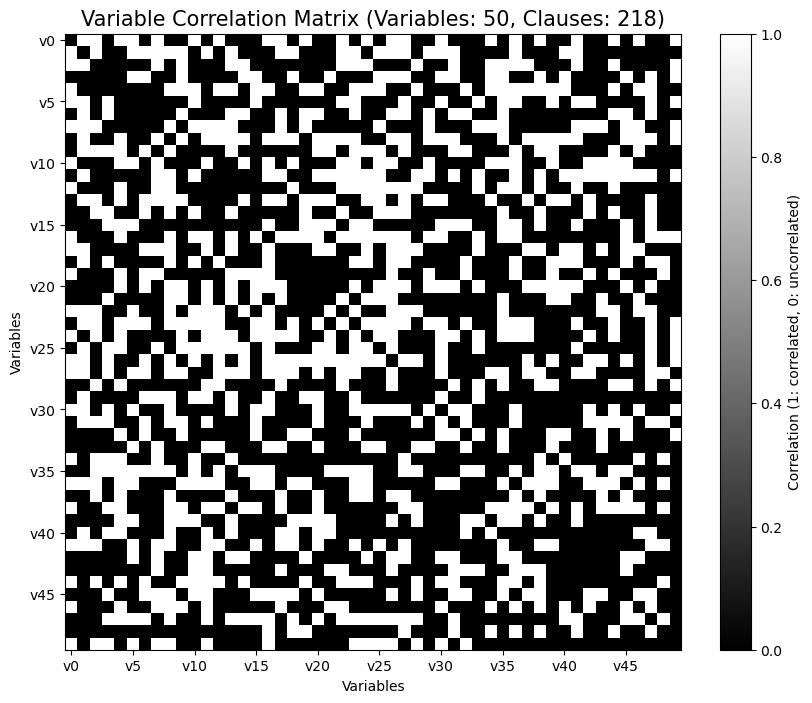

(array([[-45, -37,  -1],
        [-40,  21,  39],
        [ 34,  -8, -13],
        [-16, -21,   5],
        [-22,  36,  16],
        [-46,  19,  11],
        [ 25, -48, -27],
        [-27, -31,  -2],
        [-28,  -7,  -2],
        [ 48,  -5,  29],
        [-38,  28, -21],
        [ -4,  48,  26],
        [-25, -38,  -3],
        [  8,  -3, -50],
        [ -2, -32,  37],
        [ 32, -33,  46],
        [ 30,  34, -17],
        [-28,  39, -15],
        [ 23, -22, -44],
        [ -5,  33,  10],
        [ 11, -44,  37],
        [-25, -26,  50],
        [-19,  -9,   2],
        [ 24, -12,  37],
        [ 45, -39,  49],
        [ -9, -41,  -5],
        [ 12,  22,  26],
        [-25,  32,  16],
        [-42,  39, -16],
        [-45,   1,  39],
        [  5,  13,   9],
        [ -9, -19, -27],
        [ 41,  -4, -22],
        [-10, -22, -25],
        [ 25, -45, -31],
        [-31,  43,  47],
        [ 45, -11,  23],
        [-11, -36,  -6],
        [-18,  -1,   8],
        [ 23,   1,  -2],


In [24]:
file_path = 'example_uf50-03.cnf'
file_path = '/data2/sat/uf50-218/uf50-03.cnf'
plot_correlation_matrix(file_path)
read_cnf_file(file_path)